# Ames House Prices Prediction:

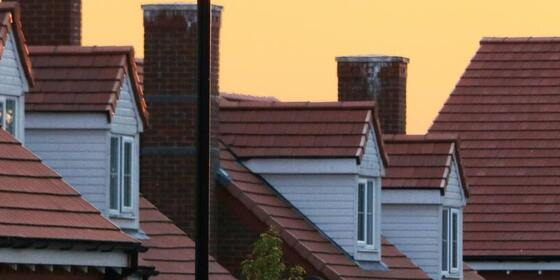

## I. Latar Belakang: 
Pasar perumahan adalah sektor penting dalam perekonomian, dan memprediksi harga rumah secara akurat sangat penting bagi pembeli, penjual, dan profesional (agen) real estat. Dengan adanya prediksi harga yang akurat dapat membantu pembeli dalam membuat keputusan yang tepat, penjual menetapkan harga yang kompetitif, dan seorang agent real estat dapat memberikan wawasan yang berharga kepada klien mereka. Teknik pembelajaran mesin dapat digunakan untuk mengembangkan model prediktif yang dapat memperkirakan harga rumah berdasarkan berbagai fitur dan faktor.

## II. Pernyataan Masalah: 
Tujuan dari proyek ini adalah untuk mengembangkan model pembelajaran mesin yang dapat memprediksi harga rumah berdasarkan serangkaian fitur input. Model tersebut akan dilatih pada data historis yang berisi informasi tentang berbagai aspek rumah, seperti:
- Jumlah Kamar
- Lokasi
- Fasilitas<br>
dan faktor relevan lainnya. Model yang telah dilatih kemudian akan digunakan untuk memprediksi harga rumah baru berdasarkan fitur-fiturnya.

## III. Dataset:

Dataset yang digunakan untuk proyek ini menggunakan dataset Ames Housing, yang dapat ditemukan di Kaggle di tautan berikut ini:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 

Dataset ini terdiri dari dua file terpisah: 
1. Set Pelatihan: Berisi informasi tentang berbagai rumah beserta harga jualnya.
2. Set Pengujian: Berisi informasi serupa tetapi tidak termasuk harga jual, yang akan diprediksi oleh model.

Dataset ini berisi banyak fitur yang menggambarkan berbagai aspek rumah, seperti jumlah kamar tidur, kamar mandi, ruang tamu, ukuran tanah, lingkungan, dan lainnya. Beberapa fitur bersifat kategoris, seperti: jenis tempat tinggal (hunian) atau kondisi berbagai fasilitas, sementara yang lain bersifat numerik, seperti: ukuran garasi atau kualitas rumah secara keseluruhan. Variabel target yang ingin diprediksi oleh model ini adalah harga jual rumah (**SalePrice**).

# Import Libraries:

In [1]:
# Import Beberapa Libraries yang Diperlukan:

import numpy as np # Linear Algebra
import pandas as pd # Data Processing
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # Ignore annoying warning (from sklearn & seaborn)


from scipy import stats
from scipy.stats import norm, skew # Statistics

# Limiting Floats Output to 3 Decimal Points:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Load Data:

In [2]:
# Meload datasets yg dibutuhkan:
train = pd.read_csv('./Ames Housing Datatrain.csv')
test = pd.read_csv('./Ames Housing Datatest.csv')

# Tampilan Awal pada Data:

## Sample of Data:

In [3]:
# Menampilkan lima baris pertama dari dataset train (pelatihan):
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Menampilkan lima baris pertama dari dataset test (pengujian):
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Business Understanding:

Dengan menyadari bahwa harga jual rumah sangat bervariasi, sehingga jika dapat memprediksi harga dengan lebih akurat, maka dapat membuat keputusan bisnis yang lebih baik.

**Keuntungan bagi Bisnis**:
1. Menawar properti dengan harga yang lebih menguntungkan:<br>
Dengan mengetahui nilai sebenarnya dari sebuah rumah, diharapkan pembeli dapat menghindari membayar terlalu mahal dan memastikan keuntungan yang sehat.
2. Menetapkan harga jual yang optimal:<br> 
Dengan mengetahui harga pasar akan membantu dalam menarik pembeli dengan cepat dan menghindari penurunan harga di masa depan.
3. Menargetkan marketing campaign secara efektif:<br> 
Mengidentifikasi faktor-faktor yang mempengaruhi harga rumah akan membantu memahami preferensi pembeli dan menyesuaikan pemasaran dengan tepat.
4. Investasi yang lebih cerdas:<br> 
Mampu memprediksi harga masa depan dapat membantu mengidentifikasi properti yang memiliki potensi kenaikan nilai yang tinggi.

# Data Understanding:

**Keterangan Kolom:**
- `SalePrice`: Harga jual properti dalam dolar. Ini adalah `variabel target yang ingin diprediksi`.
- MSSubClass: Kelas bangunan
- MSZoning: Klasifikasi zonasi umum
- LotFrontage: Panjang linear jalan yang terhubung ke properti
- LotArea: Ukuran kavling dalam kaki persegi
- Street: Jenis akses jalan
- Alley: Jenis akses gang
- LotShape: Bentuk umum properti
- LandContour: Kemiringan tanah dari properti
- Utilities: Jenis utilitas yang tersedia
- LotConfig: Konfigurasi lahan
- LandSlope: Kemiringan tanah
- Neighborhood: Lokasi fisik di dalam batas kota Ames
- Condition1: Kedekatan dengan jalan utama atau rel kereta api
- Condition2: Kedekatan dengan jalan utama atau rel kereta api (jika ada)
- BldgType: Jenis tempat tinggal
- HouseStyle: Gaya tempat tinggal
- OverallQual: Kualitas material dan hasil akhir secara keseluruhan
- OverallCond: Peringkat kondisi secara keseluruhan
- YearBuilt: Tanggal konstruksi asli
- YearRemodAdd: Tanggal renovasi ulang
- RoofStyle: Jenis atap
- RoofMatl: Bahan atap
- Exterior1st: Penutup eksterior pada rumah
- Exterior2nd: Penutup eksterior pada rumah (jika lebih dari satu bahan)
- MasVnrType: Jenis veneer batu bata
- MasVnrArea: Area veneer batu dalam kaki persegi
- ExterQual: Kualitas bahan eksterior
- ExterCond: Kondisi material saat ini di bagian eksterior
- Foundation: Jenis pondasi
- BsmtQual: Ketinggian ruang bawah tanah
- BsmtCond: Kondisi umum ruang bawah tanah
- BsmtExposure:  Dinding ruang bawah tanah di luar ruangan atau taman
- BsmtFinType1: Kualitas area akhir ruang bawah tanah
- BsmtFinSF1: Tipe 1 kaki persegi yang sudah jadi
- BsmtFinType2: Kualitas area jadi kedua (jika ada)
- BsmtFinSF2: Tipe 2 kaki persegi jadi
- BsmtUnfSF: Luas area ruang bawah tanah yang belum selesai
- TotalBsmtSF: Total kaki persegi area ruang bawah tanah
- Heating: Jenis pemanas
- HeatingQC: Kualitas dan kondisi pemanas
- CentralAir: Pendingin udara sentral
- Electrical: Sistem kelistrikan
- 1stFlrSF: Lantai Pertama kaki persegi
- 2ndFlrSF: Lantai dua meter persegi
- LowQualFinSF: Luas lantai akhir berkualitas rendah (semua lantai)
- GrLivArea: Luas ruang tamu di atas lantai dasar (tanah) dalam kaki persegi
- BsmtFullBath: Kamar mandi lengkap di ruang bawah tanah
- BsmtHalfBath: Kamar mandi setengah di ruang bawah tanah
- FullBath: Kamar mandi lengkap di atas lantai dasar
- HalfBath: Setengah kamar mandi di atas lantai dasar
- Bedroom: Jumlah kamar tidur di atas lantai dasar
- Kitchen: Jumlah dapur
- KitchenQual: Kualitas dapur
- TotRmsAbvGrd: Total ruangan di atas lantai dasar (tidak termasuk kamar mandi)
- Functional: Peringkat fungsionalitas rumah
- Fireplaces: Jumlah perapian
- FireplaceQu: Kualitas perapian
- GarageType:  Lokasi garasi
- GarageYrBlt: Tahun garasi dibangun
- GarageFinish: Hasil akhir interior garasi
- GarageCars: Ukuran garasi dalam kapasitas mobil
- GarageArea: Ukuran garasi dalam kaki persegi
- GarageQual: Kualitas garasi
- GarageCond: Kondisi garasi
- PavedDrive: Jalan masuk beraspal
- WoodDeckSF: Luas dek kayu dalam kaki persegi
- OpenPorchSF: Area teras terbuka dalam kaki persegi
- EnclosedPorch: Area teras tertutup dalam kaki persegi
- 3SsnPorch: Area teras tiga musim dalam kaki persegi
- ScreenPorch: Area beranda layar dalam kaki persegi
- PoolArea: Area kolam renang dalam kaki persegi
- PoolQC: Kualitas kolam renang
- Fence: Kualitas pagar
- MiscFeature: Fitur lain-lain yang tidak tercakup dalam kategori lain
- MiscVal: Nilai fitur lain-lain (USD)
- MoSold: Bulan Terjual
- YrSold: Tahun Terjual
- SaleType: Jenis penjualan
- SaleCondition: Kondisi penjualan

In [5]:
# Memeriksa Jumlah Sampel dan Fitur:
print("Ukuran data Train sebelum drop fitur Id adalah : {} ".format(train.shape))
print("Ukuran data Test sebelum drop fitur Id adalah : {} ".format(test.shape))

Ukuran data Train sebelum drop fitur Id adalah : (1460, 81) 
Ukuran data Test sebelum drop fitur Id adalah : (1459, 80) 


In [6]:
# Menyimpan kolom 'Id':
train_ID = train['Id']
test_ID = test['Id']

In [7]:
# Menghilangkan kolom 'Id' karena tidak diperlukan untuk proses prediksi:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [8]:
# Memeriksa kembali ukuran data setelah mendrop variabel 'Id':
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [9]:
# Mengubah Settingan Jumlah Maksimal Baris yang Dapat Ditampilkan:
pd.options.display.max_rows = 10000

In [10]:
# Mengubah Settingan Jumlah Maksimal Kolom yang Dapat Ditampilkan:
pd.options.display.max_columns = 10000

In [11]:
# Memeriksa Informasi pada Data Train:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
# Memeriksa Informasi pada Data Test:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [13]:
# Melihat statistical summary data Train:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


# Data Processing:

## Outliers:

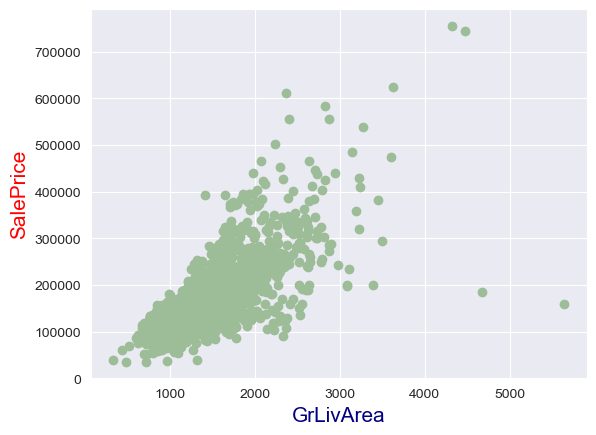

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'], color = '#9DBC98')
plt.ylabel('SalePrice', fontsize = 15, color = 'red')
plt.xlabel('GrLivArea', fontsize = 15, color = 'navy')
plt.show()

Dapat dilihat bahwa di sebelah kanan bawah terdapat dua titik (nilai) dengan GrLivArea yang sangat besar (luas) namun dengan harga yang sangat murah. Nilai-nilai ini adalah outliers yang sangat besar. Oleh karena itu, sebaiknya Outlier tersebut dihapus.

In [15]:
# Menghapus Outliers:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

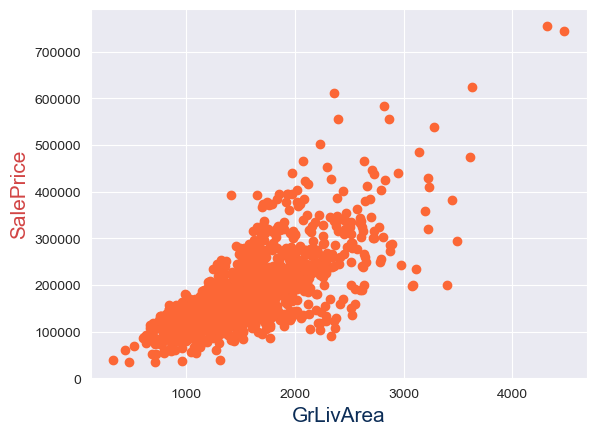

In [16]:
# Memeriksa grafiknya kembali:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'], color = '#FC6736')
plt.ylabel('SalePrice', fontsize = 15, color = '#D24545')
plt.xlabel('GrLivArea', fontsize = 15, color = '#0C2D57')
plt.show()

**Note**:

Kami memutuskan untuk menghapus kedua Outlier tersebut karena sangat besar dan sangat buruk (area yang sangat luas dengan harga yang sangat rendah). 

Mungkin masih terdapat Outlier lain dalam data train. Namun, dengan menghapus semuanya dapat mempengaruhi model dengan buruk jika terdapat Outlier juga dalam data test.

## Target Variable:

**SalePrice** adalah variabel yang ingin diprediksi. Sehingga akan melakukan analisis pada variabel ini terlebih dahulu.


 mu = 180932.92 and sigma = 79467.79



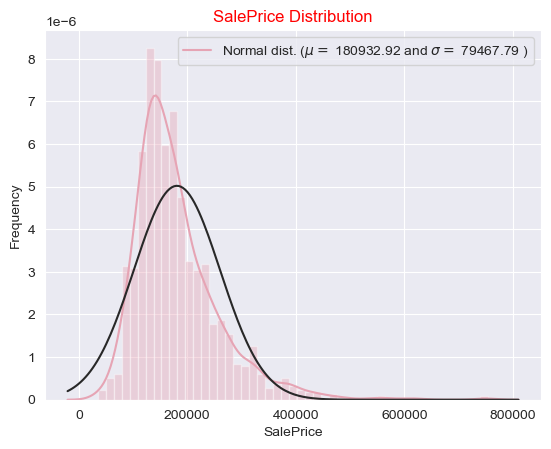

In [17]:
sns.distplot(train['SalePrice'], fit = norm, color = '#E6A4B4');

# Mendapatkan parameter yang digunakan oleh fungsi tersebut:
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot Distribusi:
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution', color = 'red');

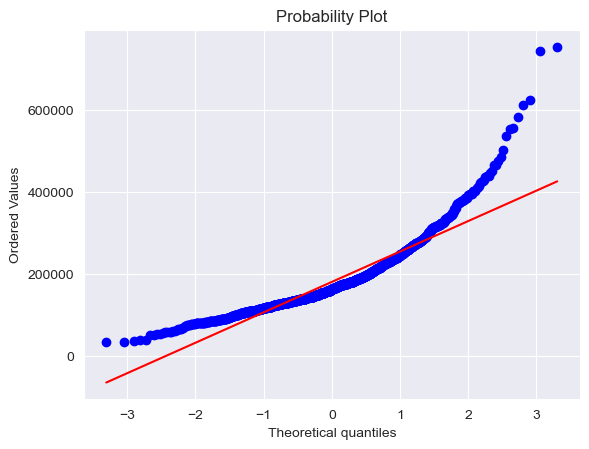

In [18]:
# Menampilkan QQ plot:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

Variabel target `(SalePrice)` cenderung miring ke kanan.  Karena model (linier) menyukai data yang terdistribusi normal, sehingga perlu untuk mentransformasikan variabel ini dan membuatnya lebih terdistribusi normal.

### Log-Transformation pada Target Variable:


 mu = 12.02 and sigma = 0.40



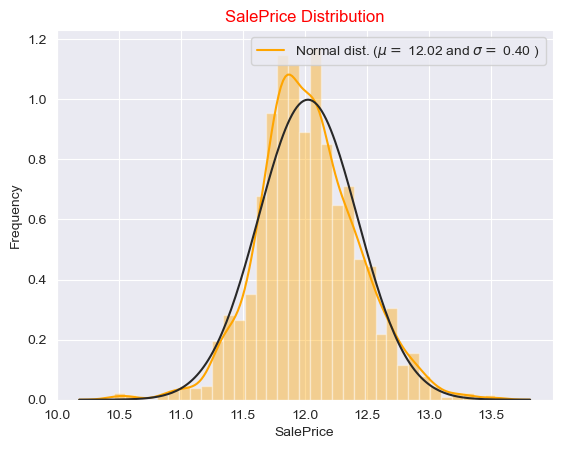

In [19]:
# Dengan Menggunakan Fungsi Numpy log1p yang menerapkan log(1+x) ke semua elemen kolom:
train["SalePrice"] = np.log1p(train["SalePrice"])

# Memerikasa Distribusi Baru:
sns.distplot(train['SalePrice'] , fit = norm, color = 'orange')

# Menapatkan parameter yang digunakan oleh fungsi tersebut:
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot Distribusi:
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution', color = 'red');

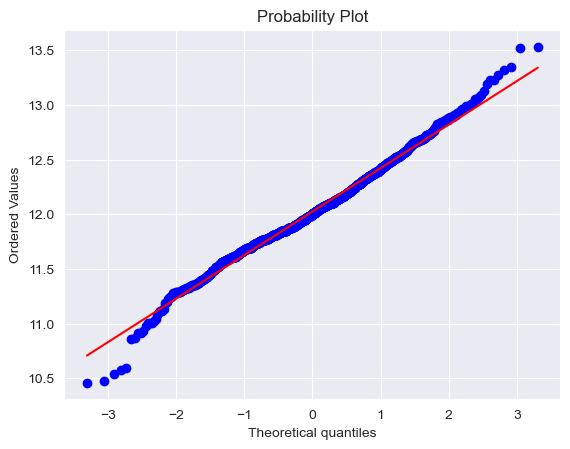

In [20]:
# Show the QQ-plot:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

Kemiringan tersebut sekarang sudah tampak terkoreksi dan data tampak lebih terdistribusi secara normal.

## Features Engineering 1:

Pertama-tama akan menggabungkan data Train dan data Test dalam DataFrame yang sama.

In [21]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


# Basic Data Cleansing:

## Missing Values:

In [22]:
alldata_na = (all_data.isnull().sum() / len(all_data)) * 100
alldata_na = alldata_na.drop(alldata_na[alldata_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :alldata_na})
missing_data

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


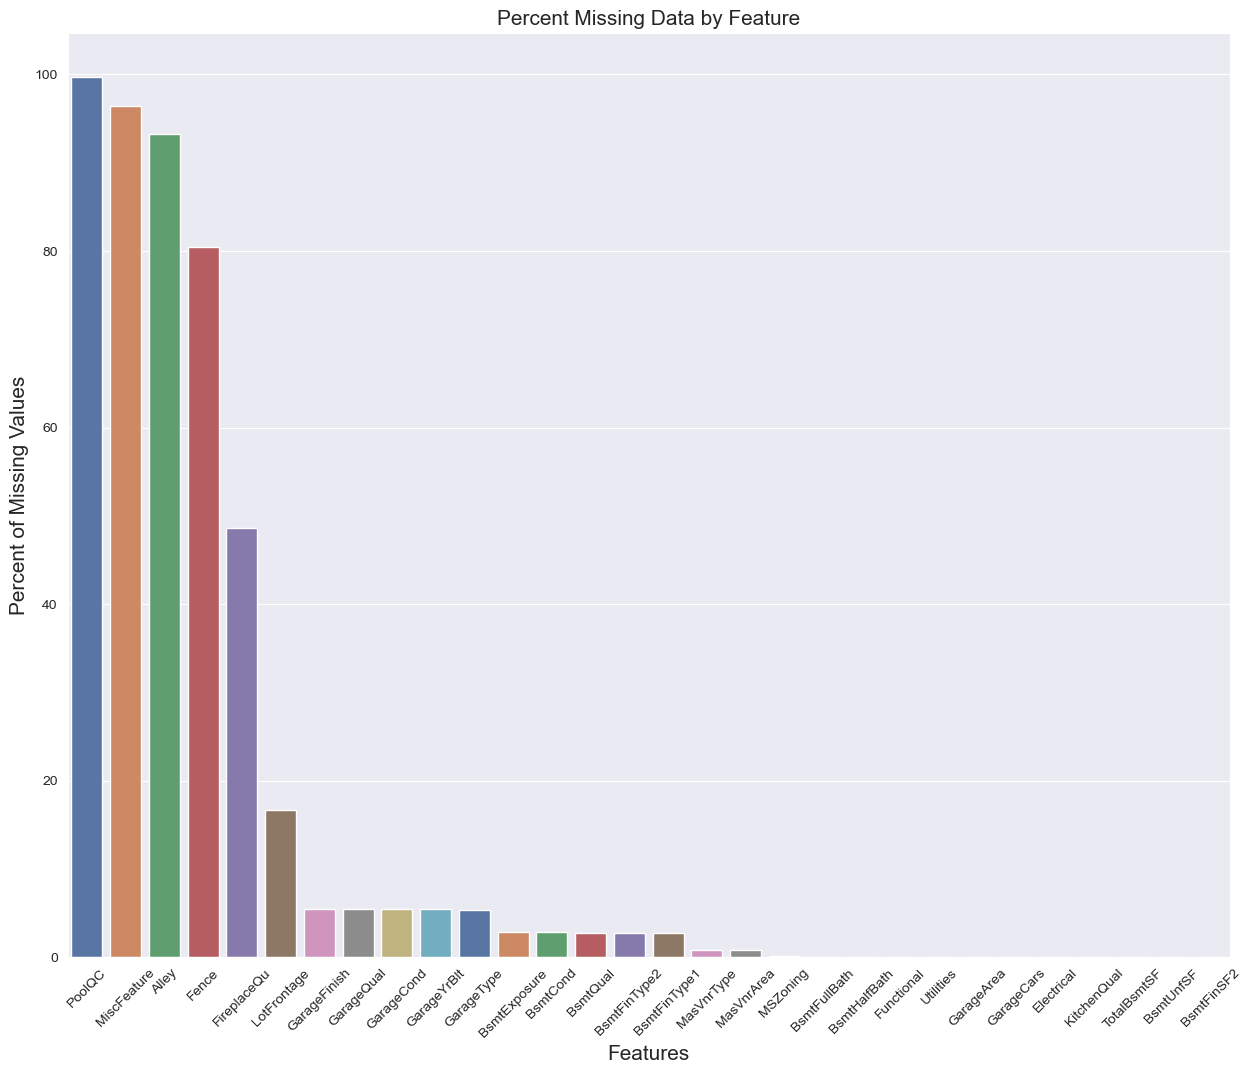

In [23]:
# Memvisualisasikan Data yg Mengalami Missing Values:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = 45)
sns.barplot(x = alldata_na.index, y = alldata_na, palette = 'deep')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent of Missing Values', fontsize = 15)
plt.title('Percent Missing Data by Feature', fontsize = 15); 

## Data Correlation:

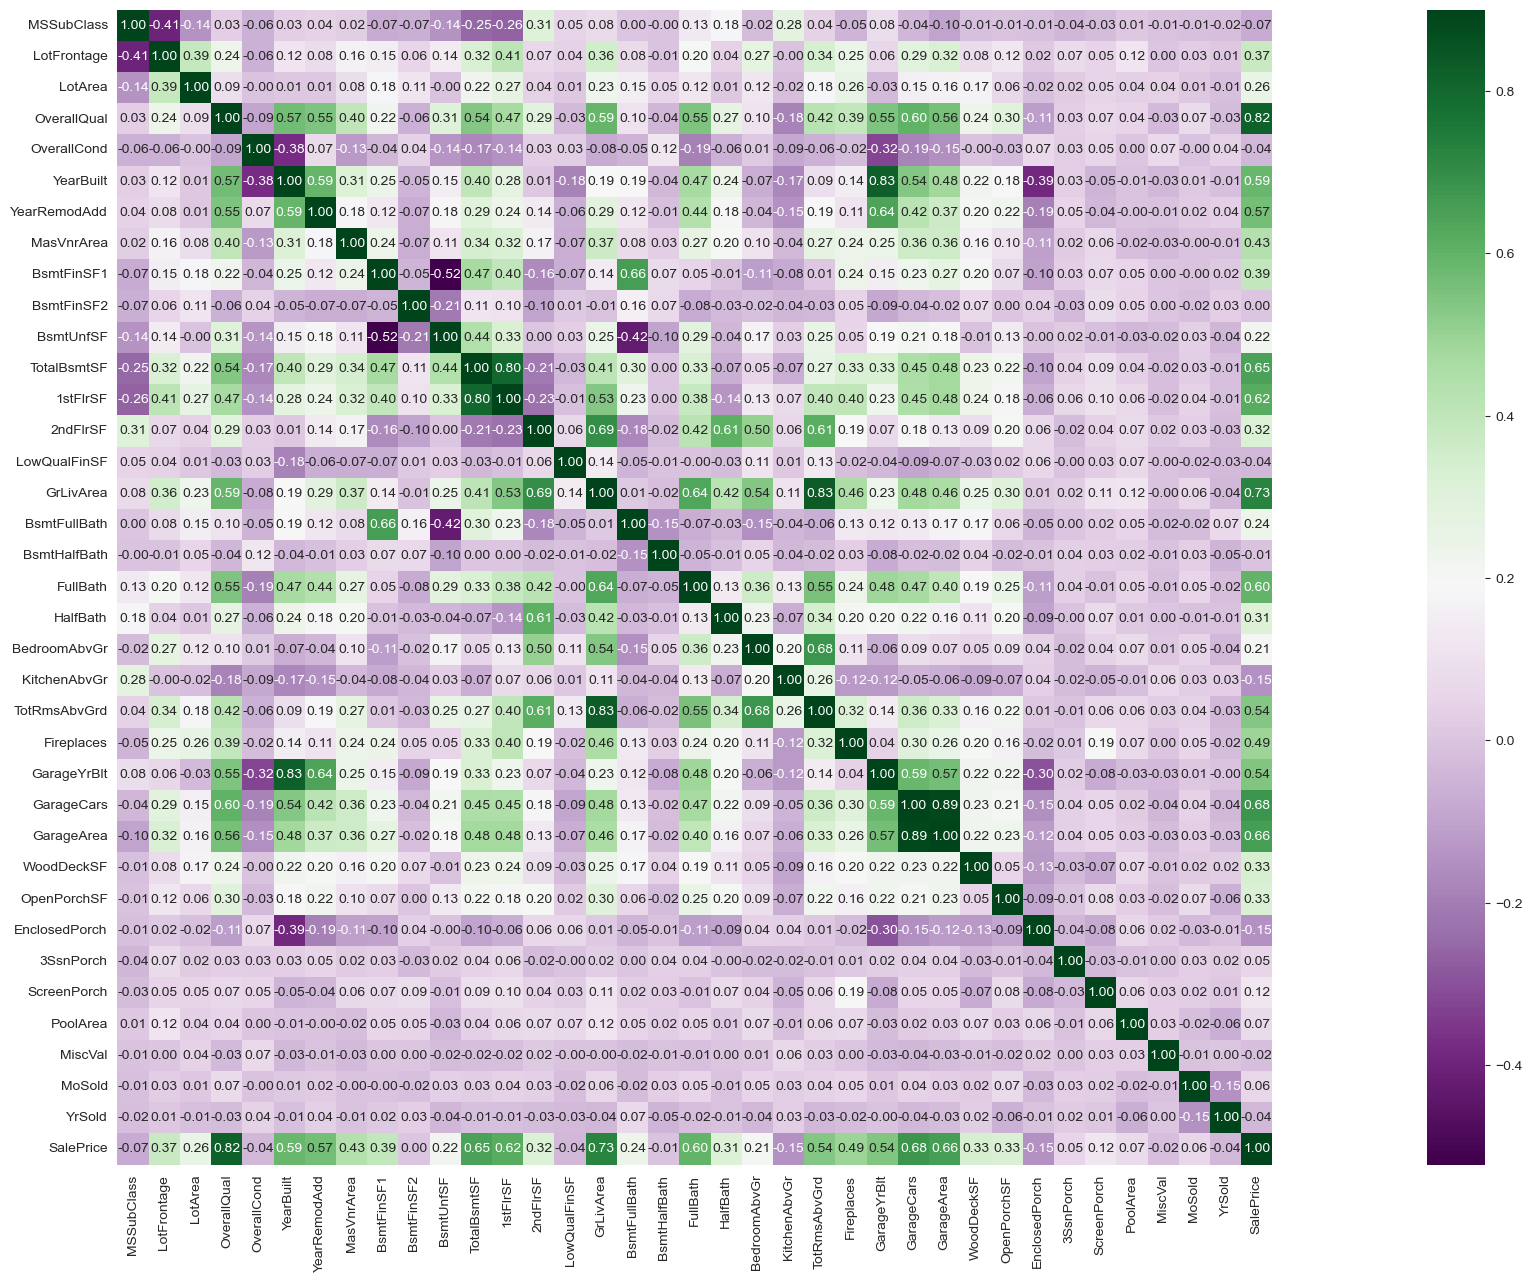

In [24]:
# Correlation Heatmap untuk melihat bagaimana fitur-fitur berkorelasi dengan SalePrice:
correlation = train.corr()
plt.subplots(figsize = (40, 15))
sns.heatmap(correlation, vmax = 0.9, square = True, annot = True, fmt = '.2f', cmap = 'PRGn');

## Imputing Missing Values:

Memperhitungkannya dengan melanjutkan secara berurutan melalui fitur-fitur yang memiliki Missing Values.

1. **PoolQC**: Pada deskripsi data menampilkan `NA` yang berarti "Tidak Terdapat Kolam Renang". Hal ini masuk akal, mengingat rasio Missing Values sangat besar (+99%) dan sebagian besar rumah secara umum tidak memiliki kolam renang. 

In [25]:
# 1. PoolQC:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

2. **MiscFeature**: Pada deskripsi data menampilkan NA yang berarti "tidak ada fitur lain".

In [26]:
# 2. MiscFeature:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

3. **Alley** : Keterangan pada data menampilkan NA berarti "tidak terdapat akses gang".

In [27]:
# 3. Alley :
all_data["Alley"] = all_data["Alley"].fillna("None")

4. **Fence**: Keterangan pada data menampilkan NA berarti "tidak terdapat pagar".

In [28]:
# 4. Fence:
all_data["Fence"] = all_data["Fence"].fillna("None")

5. **FireplaceQu**: Pada deskripsi data menampilkan NA berarti "tidak terdapat perapian".

In [29]:
# 5. FireplaceQu:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

6. **LotFrontage**: Karena area setiap jalan yang terhubung ke properti rumah berkemungkinan besar memiliki area yang sama dengan rumah lain di lingkungannya, sehingga dapat **mengisi Missing Values dengan Median LotFrontage dari lingkungan tersebut**.

In [30]:
all_data['LotFrontage'].median()

68.0

In [31]:
# 6. LotFrontage:
# Mengelompokkan berdasarkan lingkungan dan mengisi Missing Values 
# dengan Median LotFrontage dari semua lingkungan:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

7. **GarageType, GarageFinish, GarageQual** dan **GarageCond**: Mengganti Missing Valuesnya dengan None.

In [32]:
# 7. GarageType, GarageFinish, GarageQual dan GarageCond:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

8. **GarageYrBlt, GarageArea** dan **GarageCars**: Mengganti Missing Valuesnya dengan 0 (Karena Tidak ada garasi = tidak ada mobil di garasi tersebut).

In [33]:
# 8. GarageYrBlt, GarageArea dan GarageCars:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

9. **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath,** dan **BsmtHalfBath**: Missing Valuesnya kemungkinan besar nol (0) karena tidak memiliki ruang bawah tanah.

In [34]:
# 9. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, dan BsmtHalfBath:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

10. **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1** dan **BsmtFinType2**: Untuk semua fitur terkait ruang bawah tanah kategorikal ini, NaN berarti tidak terdapat ruang bawah tanah.

In [35]:
# 10. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 dan BsmtFinType2:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

11. **MasVnrArea** dan **MasVnrType**: NA kemungkinan besar berarti tidak terdapat veneer batu bata untuk rumah-rumah tersebut. Sehingga dapat mengisi 0 untuk area dan None untuk tipe.

In [36]:
# 11. MasVnrArea dan MasVnrType:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

12. **MSZoning (Klasifikasi zonasi umum)**: 'RL' (Residential Low Density) sejauh ini merupakan nilai yang paling umum.  Sehingga dapat mengisi Missing Valuesnya dengan 'RL'.

**Note**:
Residential Low Density: Interpretasi yang paling umum dan mengacu pada area perumahan dengan kepadatan penduduk rendah, umumnya terdiri dari rumah-rumah single-family detached.

`Karakteristik`:
- Lot yang lebih besar.
- Jarak antar rumah yang lebih luas.
- Tingkat kebisingan yang lebih rendah.

In [37]:
# 12. MSZoning:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

13. **Utilities**: Untuk fitur kategorikal ini, semua catatan adalah "AllPub", kecuali satu "NoSeWa" dan 2 NA. Karena rumah dengan 'NoSewa' terdapat di dalam training set, maka **fitur ini tidak akan membantu dalam pemodelan prediktif**, sehingga akan dihapus.

In [38]:
# 13. Utilities:
all_data = all_data.drop(['Utilities'], axis = 1)

14. **Functional** : Pada deskripsi data menampilkan NA yang berarti tidak khas.

In [39]:
# 14. Functional:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

15. **Electrical**: Fitur ini memiliki satu nilai NA. Karena fitur ini sebagian besar memiliki 'SBrkr', sehingga dapat diisi untuk Missing Valuesnya.

In [40]:
all_data['Electrical'].mode()[0]

'SBrkr'

In [41]:
# 15. Electrical:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

16. **KitchenQual**: Hanya terdapat satu nilai NA, dan sama seperti Electrical, maka akan menetapkan 'TA' (yang paling sering) untuk Missing Values di KitchenQual.

In [42]:
all_data['KitchenQual'].mode()[0]

'TA'

In [43]:
# 16. KitchenQual:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

17. **Exterior1st and Exterior2nd**: Exterior1st and Exterior2nd hanya memiliki satu missing value. Sehingga akan diganti dengan string yang paling umum (modus).

In [44]:
print(all_data['Exterior1st'].mode()[0])
print(all_data['Exterior2nd'].mode()[0])

VinylSd
VinylSd


In [45]:
# 17. Exterior1st and Exterior2nd:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

18. **SaleType**: Mengisi dengan yang paling sering muncul yaitu "WD".

In [46]:
all_data['SaleType'].mode()[0]

'WD'

In [47]:
# 18. SaleType:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

19. **MSSubClass**: Na kemungkinan besar berarti Tidak memiliki kelas bangunan. Sehingga dapat mengganti missing valuenya dengan None.

In [48]:
# 19. MSSubClass:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Memeriksa apakah masih terdapat sisa Missing Values? 

In [49]:
# Memeriksa sisa Missing Values jika ada: 
alldata_na = (all_data.isnull().sum() / len(all_data)) * 100
alldata_na = alldata_na.drop(alldata_na[alldata_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :alldata_na})
missing_data

,Missing Ratio


Dengan demikian sudah tidak terdapat Missing Values lagi.

## Features Engineering 2:

### 1. Mengubah Beberapa Variabel Numerik yang Sebenarnya Kategorikal:

In [50]:
# MSSubClass = Kelas bangunan:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [51]:
# Mengubah OverallCond menjadi variabel kategorikal:
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [52]:
# Tahun dan bulan terjual diubah menjadi fitur kategorikal:
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### 2. Label Encoding pada beberapa variabel kategorikal yang mungkin berisi informasi dalam himpunan urutannya:

In [53]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [54]:
# Memproses Kolom, menerapkan LabelEncoder ke fitur kategorikal:
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [55]:
# Memeriksa shape datanya:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


### 3. Menambahkan satu lagi fitur penting:

Karena fitur mengenai area sangat penting untuk menentukan harga rumah, sehingga menambahkan satu fitur lagi yaitu luas total area basement, lantai satu dan lantai dua dari setiap rumah.

In [56]:
# Menambahkan fitur sqfootage: 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### 4. Skewed Features:

In [57]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Memeriksa kemiringan semua fitur numerik:
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print("\nSkew (Kemiringan) pada fitur numerical: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew (Kemiringan) pada fitur numerical: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


### 5. Transformasi Box Cox dari fitur yang (sangat) miring:

Dengan menggunakan fungsi scipy boxcox1p yang menghitung transformasi Box-Cox dari **\\(1 + x\\)**. 

Perhatikan bahwa pengaturan \\( \lambda = 0 \\) setara dengan log1p yang digunakan di atas untuk variabel target.  

Lihat [halaman ini][1] untuk rincian lebih lanjut tentang Transformasi Box Cox serta [halaman fungsi scipy][2]
[1]: http://onlinestatbook.com/2/transformations/box-cox.html
[2]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [58]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


### 6. Mendapatkan dummy fitur kategorikal:

In [59]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


Mendapatkan train dan test set baru. 

In [60]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modeling: